In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
import seaborn as sns
from cobra.io import load_json_model


In [ ]:
model_path = '../assets'
model_id = 'iJO1366_WT_semi-unconstrained.json'
# We import pre-compiled data as it is faster for bigger models
wt_model = load_json_model(model_path + '/' + model_id)

model_id = 'iJO1366_NAD_semi-unconstrained.json'
# We import pre-compiled data as it is faster for bigger models
sc_model = load_json_model(model_path + '/' + model_id)


In [47]:
#fva_wt = pd.read_csv('FVA.wt.results.optim.09Oct2021.csv',index_col=0)
#fva_sc = pd.read_csv('FVA.sc.results.optim.09Oct2021.csv',index_col=0)

fva_wt = pd.read_csv('../results/FVA/11Oct2021_v2/WT/FVA.wt.results.optimal.csv',index_col=0)
fva_sc = pd.read_csv('../results/FVA/11Oct2021_v2/SC/FVA.sc.results.optimal.csv',index_col=0)


In [48]:
fva_sc.columns = ['min (SC)','max (SC)']
fva_wt.columns = ['min (WT)','max (WT)']
df = fva_sc.join(fva_wt)


rxns = []
rtype = []
for rn,row in df.iterrows():
    if (row['min (WT)'] > 0) & (row['max (SC)'] < 0) :
        rxns.append(rn)
        rtype.append('positive to negative')
    elif (row['max (WT)'] < 0) & (row['min (SC)'] > 0) :
        rxns.append(rn)
        rtype.append('negative to positive')
        
res = pd.DataFrame({'rxn':rxns,'rtype':rtype})

In [50]:
res

,rxn,rtype
0,DM_co2_e,negative to positive
1,ACKr,negative to positive
2,CO2tex,positive to negative
3,CO2tpp,positive to negative
4,GHMT2r,negative to positive
5,MTHFC,negative to positive
6,PTAr,positive to negative
7,RPE,negative to positive
8,TALA,negative to positive
9,TKT1,negative to positive


In [49]:
#df[(df['max (WT)'] > 100) & (df['max (SC)'] < 100)]

,min (SC),max (SC),min (WT),max (WT)
DM_h_e,-993.391069,6.598408,100.887256,1000.000000
DM_no2_e,0.000000,0.000000,494.336650,870.010338
ARBt2rpp,-0.000300,0.000450,-0.000172,1000.000000
ARBt3ipp,0.000000,0.000450,0.000000,1000.000000
ARGORNt7pp,0.000000,0.000450,0.000000,1000.000000
...,...,...,...,...
NADH17pp,0.000000,0.000450,-299.022409,1000.000000
NADH5,0.000000,0.000300,0.000000,914.238124
NADH9,0.000000,0.000301,0.000000,914.249160
NHFRBO,0.000000,0.000069,0.000000,346.775711


In [45]:
# the single coenzyme model is restricted to negative flux, because the coenzyme is not sufficiently oxidized to push the reaction forward. 

,min (SC),max (SC),min (WT),max (WT)
DM_4CRSOL,0.003446,0.003446,0.002759,0.002759
DM_5DRIB,0.003570,0.003580,0.002858,0.002869
DM_AACALD,0.000000,0.000000,0.000000,0.000000
DM_AMOB,0.000031,0.000031,0.000025,0.000025
DM_MTHTHF,0.020707,0.020718,0.016579,0.016590
...,...,...,...,...
UAPGR,0.426150,0.426162,0.341198,0.341212
UDPGD,0.000000,0.000000,0.000000,0.000000
UDPGDC,0.000000,0.000000,0.000000,0.000000
URDGLYCD,0.000000,0.000012,0.000000,0.000011


<AxesSubplot:xlabel='max (WT)', ylabel='max (SC)'>

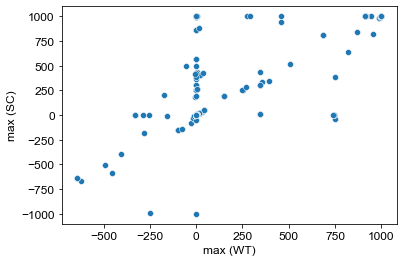

In [38]:
sns.scatterplot(data=df,x='max (WT)',y='max (SC)')

<AxesSubplot:xlabel='min (WT)', ylabel='min (SC)'>

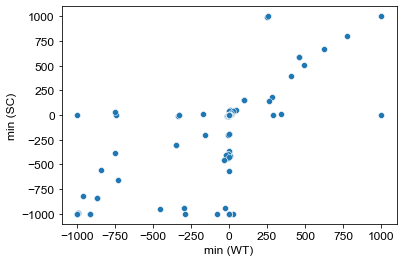

In [39]:
sns.scatterplot(data=df,x='min (WT)',y='min (SC)')

In [10]:
df[df['min (WT)'] > 500]

,min (SC),max (SC),min (WT),max (WT)
ALAt4pp,0.0,1000.0,1000.0,1000.0
